# Example 2. Linear Gredian Decent Regression
---

We use hand-write [AdalineGD](AdalineGD.py) to achive the regression results. 

**1\. Import modules & Boston Housing data**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
df =  pd.DataFrame( data=boston.data )
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**2\. Extract single explanatory/target variables**

In [3]:
X = df[['RM']].values
y = df[['MEDV']].values # Add more [] to avoid getting WARNING in standardization

**3\. Standardization variable**
<br /> Standardize both X and y, since the fit is for both!

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)[:, 0] # [:, 0] for make N-d list to 1-d list

**4\. Load and use LGDR to fit**
<br /> The ``AdalineGD`` is *Adapte Linear Neuron Gradian Decent* which is also *Linear Gredian Decent Regression*

In [6]:
from AdalineGD import AdalineGD
lr = AdalineGD()
lr.fit(X_std, y_std)

**5\. Show the Sum sqaurd error (SSE) as function of epoch**

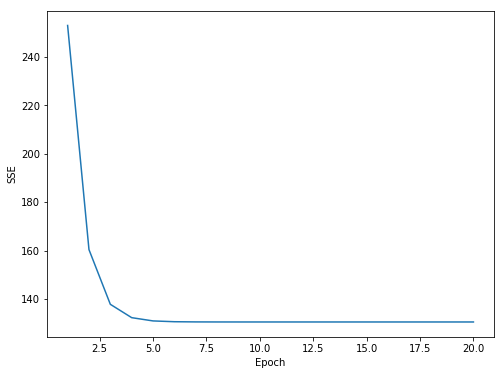

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

**6\. Show the fitted linear regression function**

In [8]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return

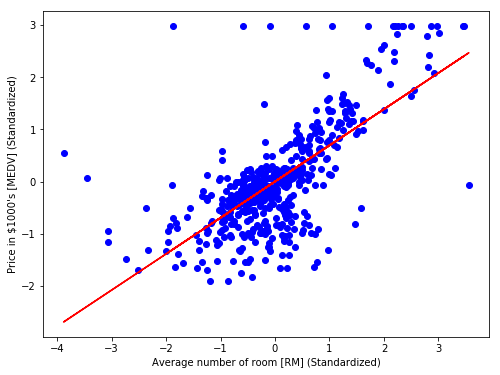

In [9]:
plt.figure(figsize=(8,6))
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of room [RM] (Standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (Standardized)' )
plt.show()

In [10]:
# Transform standardized price to real price
num_room_std = sc_X.transform([[5.0]])
price_std = lr.predict(num_room_std)
print 'Price in $1000\'s: %.3f'%( sc_y.inverse_transform(price_std) )

Price in $1000's: 10.840


In [11]:
print 'Slope: %.3f'% lr.w_[1]
print 'Intercept: %.3f'% lr.w_[0] # since standarized, the intercept should be 0

Slope: 0.695
Intercept: -0.000
